# Redes Populares
## LeNet5 1998
La LeNet (Yann **Le**cun) es una familia de redes
[Sik-Ho-Tsang](https://sh-tsang.medium.com/paper-brief-review-of-lenet-1-lenet-4-lenet-5-boosted-lenet-4-image-classification-1f5f809dbf17) describe  esta familia.

La arquitectura de la LeNet-5 esta en la siguiente Figura.





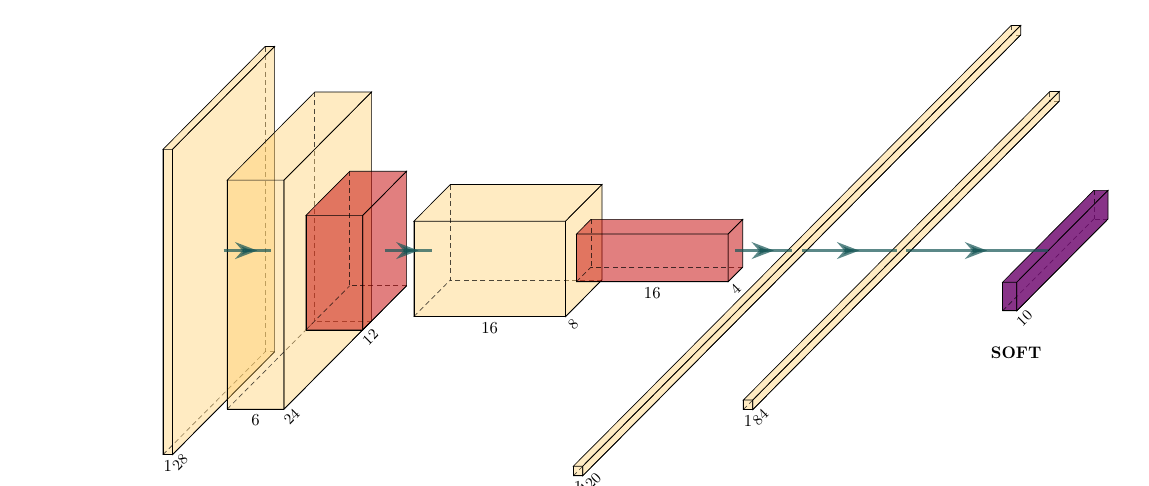

El gran valor que tiene la LetNet es que es la **primera** red en CNN que muestra como funciona de bien el **backpropagation**.

En resumen la LeNet-5 está construida así

* 3 capas convolutivas
* 2 average pooling.
* 1 fully connected (densa luego de "flattening")
* A softmax classifier (clasificación softmax).

El sitio [medium.com website](https://pub.towardsai.net/the-architecture-implementation-of-lenet-5-eef03a68d1f7) explica con detalle la red. Sin embargo, esto tambien lo hacemos en esta clase.

Un poco de historia: La LeNet-5 la dasarrollaron Yann André LeCun, Leon Bottow, Yoshua Bengio, y Patric Haffer.

 Y. Lecun, L. Bottou, Y. Bengio, and P. Haffner. Gradient-based learning applied to
document recognition. Proceedings of the IEEE, 86(11):2278–2324, 1998.

Comencemos con el detalle de la arquitecrura.

* **L0**: Capa de entrada con imágnes de $28 \times 28$ pixeles en escala de gris. Tomados de la base de datos del MNIST.

* **L1**:  Es la primera capa convolucional (tambien se conoce como **C1**). Es de kernel de $5 \times 5$, no padding $p=0$, stride $s=1$. Entonces se reduce de $28 \times 28$ a
$$(N-k+p)/s + 1 = (28 - 5)/1 + 1 = 24 $$
La salida des de $24 \times 24$. Los filtros son 6.
La salida queda $24 \times 24 \times 6$
Los parametros de entrenamiento son
$$ \text{training parameters} = (5 \times 5 \times 1) \times 6=156$$
Oririginalmente la actavación era tanh. En ese entonces no existe el ReLU. Recuerden que la tanh sufre el vanishing gradient. Entonces vamos a cambiar la red original y usamos ReLU.

**L1P** : Pooling, luego de la primera capa convolucional. Se usa
$k_x=2, k_y=2$, $s=2$ (reducir los datos), no padding.
Veamos los "feature maps" , con 6 filtros.

$$\text{\# feature maps} =
\left [ \frac{24-2}{2} + 1 \right ]
\times \left [ \frac{24-2}{2} + 1 \right ]   \times 6
= 12 \times 12 \times 6 = 864.
$$

**L2**: Segunda convolución. Kernel size $5 \times 5$, filtros 16. Padding $p=0$, striding $s=1$. La salida tiene tamaño $8 \times 8 \times 16$
dado que $$(12 -5)/1 + 1 = 8 $$
Contemos los parámetros

$$\text{training parameters} = ( 5 \times 5 \times 6 +1) \times 16 =2416$$

**L2P**: Otro average pooling. Kernel $2 \times 2$, stride $s=2$. 16 filtros.
Rapidamente
$$(8-2)/2+1 = 4 $$.
La salida es $4 \times 4 \times 16$.

En el programa que hacemos abajo, simplemente llamamos "flat".

**L3**: La tercera capa convolutiva tiene como objeto hacer "flat"(hacer del tensor un "chorizo"). Como hacemos esto? El filro es de $4 \times 4$.
$((4 -4 + 0)/1 + 1= 1 $ con $p=0$, $s=1$ si le ponemos 120 filtros de salida tenemos
La dimension de la salida es

$$ 1 \times 1 \times 120 $$

Contemos parámetros

$$\text{training parameters} = (4 \times 4 \times 16 +1) \times 120=30840$$

**L4**: Primera capa densa (fully connected). Con 84 nodos ("filtros de salida").
La salida es $1 \times 1 \times 84$, o $84$
El número de parámetros

$$\text{training parameters} = (120 + 1) \times 84 = 10164 $$

Finalmente al "softmax" de salida (color violeta)

$$\text{training parameters} = (84 + 1) \times 10 = 850.



## Codigo de la LeNet-5 en `Python` (usando TensorFlow/Keras).

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from keras.layers import Conv2D, AvgPool2D, Flatten, Dense
# optimizers
from tensorflow.keras.optimizers import Adam
# one hot encoding
from tensorflow.keras.utils import to_categorical

# para graficar
from keras.utils import plot_model

In [2]:
# cargue los datos en train test,
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# print dimensiones
print("size of train_x", train_x.shape)
print("size of train_y",train_y.shape)
print("size of test_x" ,test_x.shape)
print("size of test_y ", test_y.shape)

size of train_x (60000, 28, 28)
size of train_y (60000,)
size of test_x (10000, 28, 28)
size of test_y  (10000,)


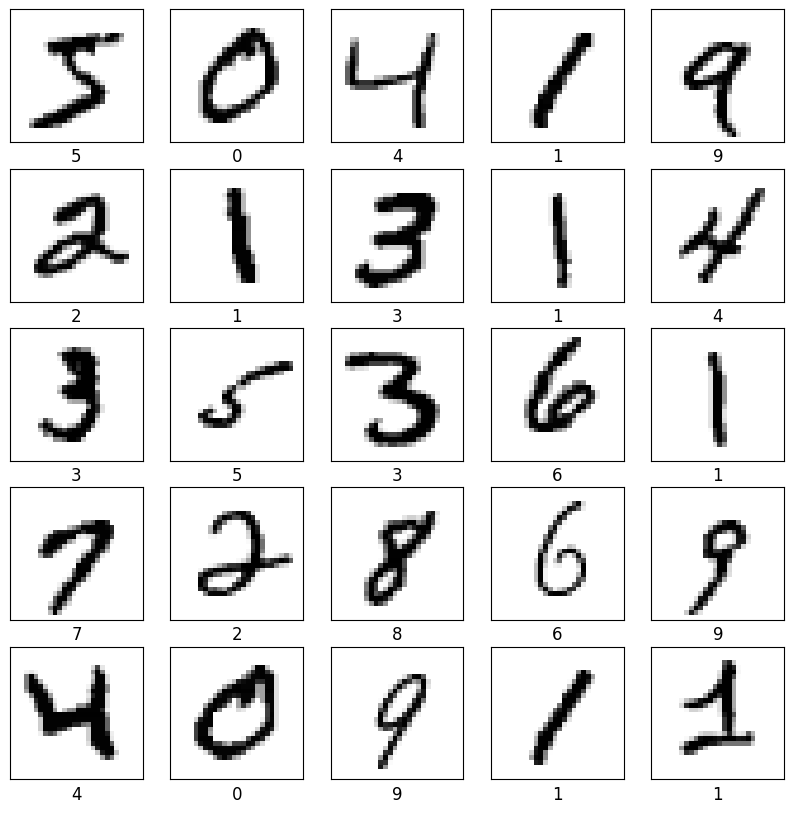

In [4]:
# plot some data
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))

# plot 25 images
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_x[i], cmap=plt.cm.binary)

  # show labels
  xlabel = "{0}".format(train_y[i])
  plt.xlabel(xlabel, fontsize=12)
plt.show()

In [5]:
# convert data into 4 rank tensor
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

In [6]:
# normalization to ge data in [0,1]
train_x = train_x/255
test_x = test_x/255

In [7]:
# one-hot encoding the labels
train_y = to_categorical(train_y, 10)
test_y = to_categorical(test_y, 10)

In [8]:
# construimos la arquiectura.
model = keras.Sequential()

# add convolutional layer, 6 filters, 5x5, p=0,s=1. ReLU
model.add(Conv2D(6, kernel_size=5, activation='relu', input_shape=(28,28, 1)))

# average pooling, kernle 2x2, strid 2
model.add(AvgPool2D(pool_size=(2,2), strides=(2,2)))



# add convolutional layer, 16 filters, kernel 5x5
model.add(Conv2D(16, kernel_size=(5,5), padding='valid', activation='relu'))

# average pooling, kernel 2x2, s=2
model.add(AvgPool2D(pool_size=(2,2), strides=(2,2)))

# flatten (se podria hacer una convolucón con 4x4)
model.add(Flatten())

# dense layer with 120 "filters" (neuronas)
model.add(Dense(120, activation='relu'))

# dense layer with 84 neuronas de salida
model.add(Dense(84, activation='relu'))

# softmax layer with 10 neuronas de salida
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

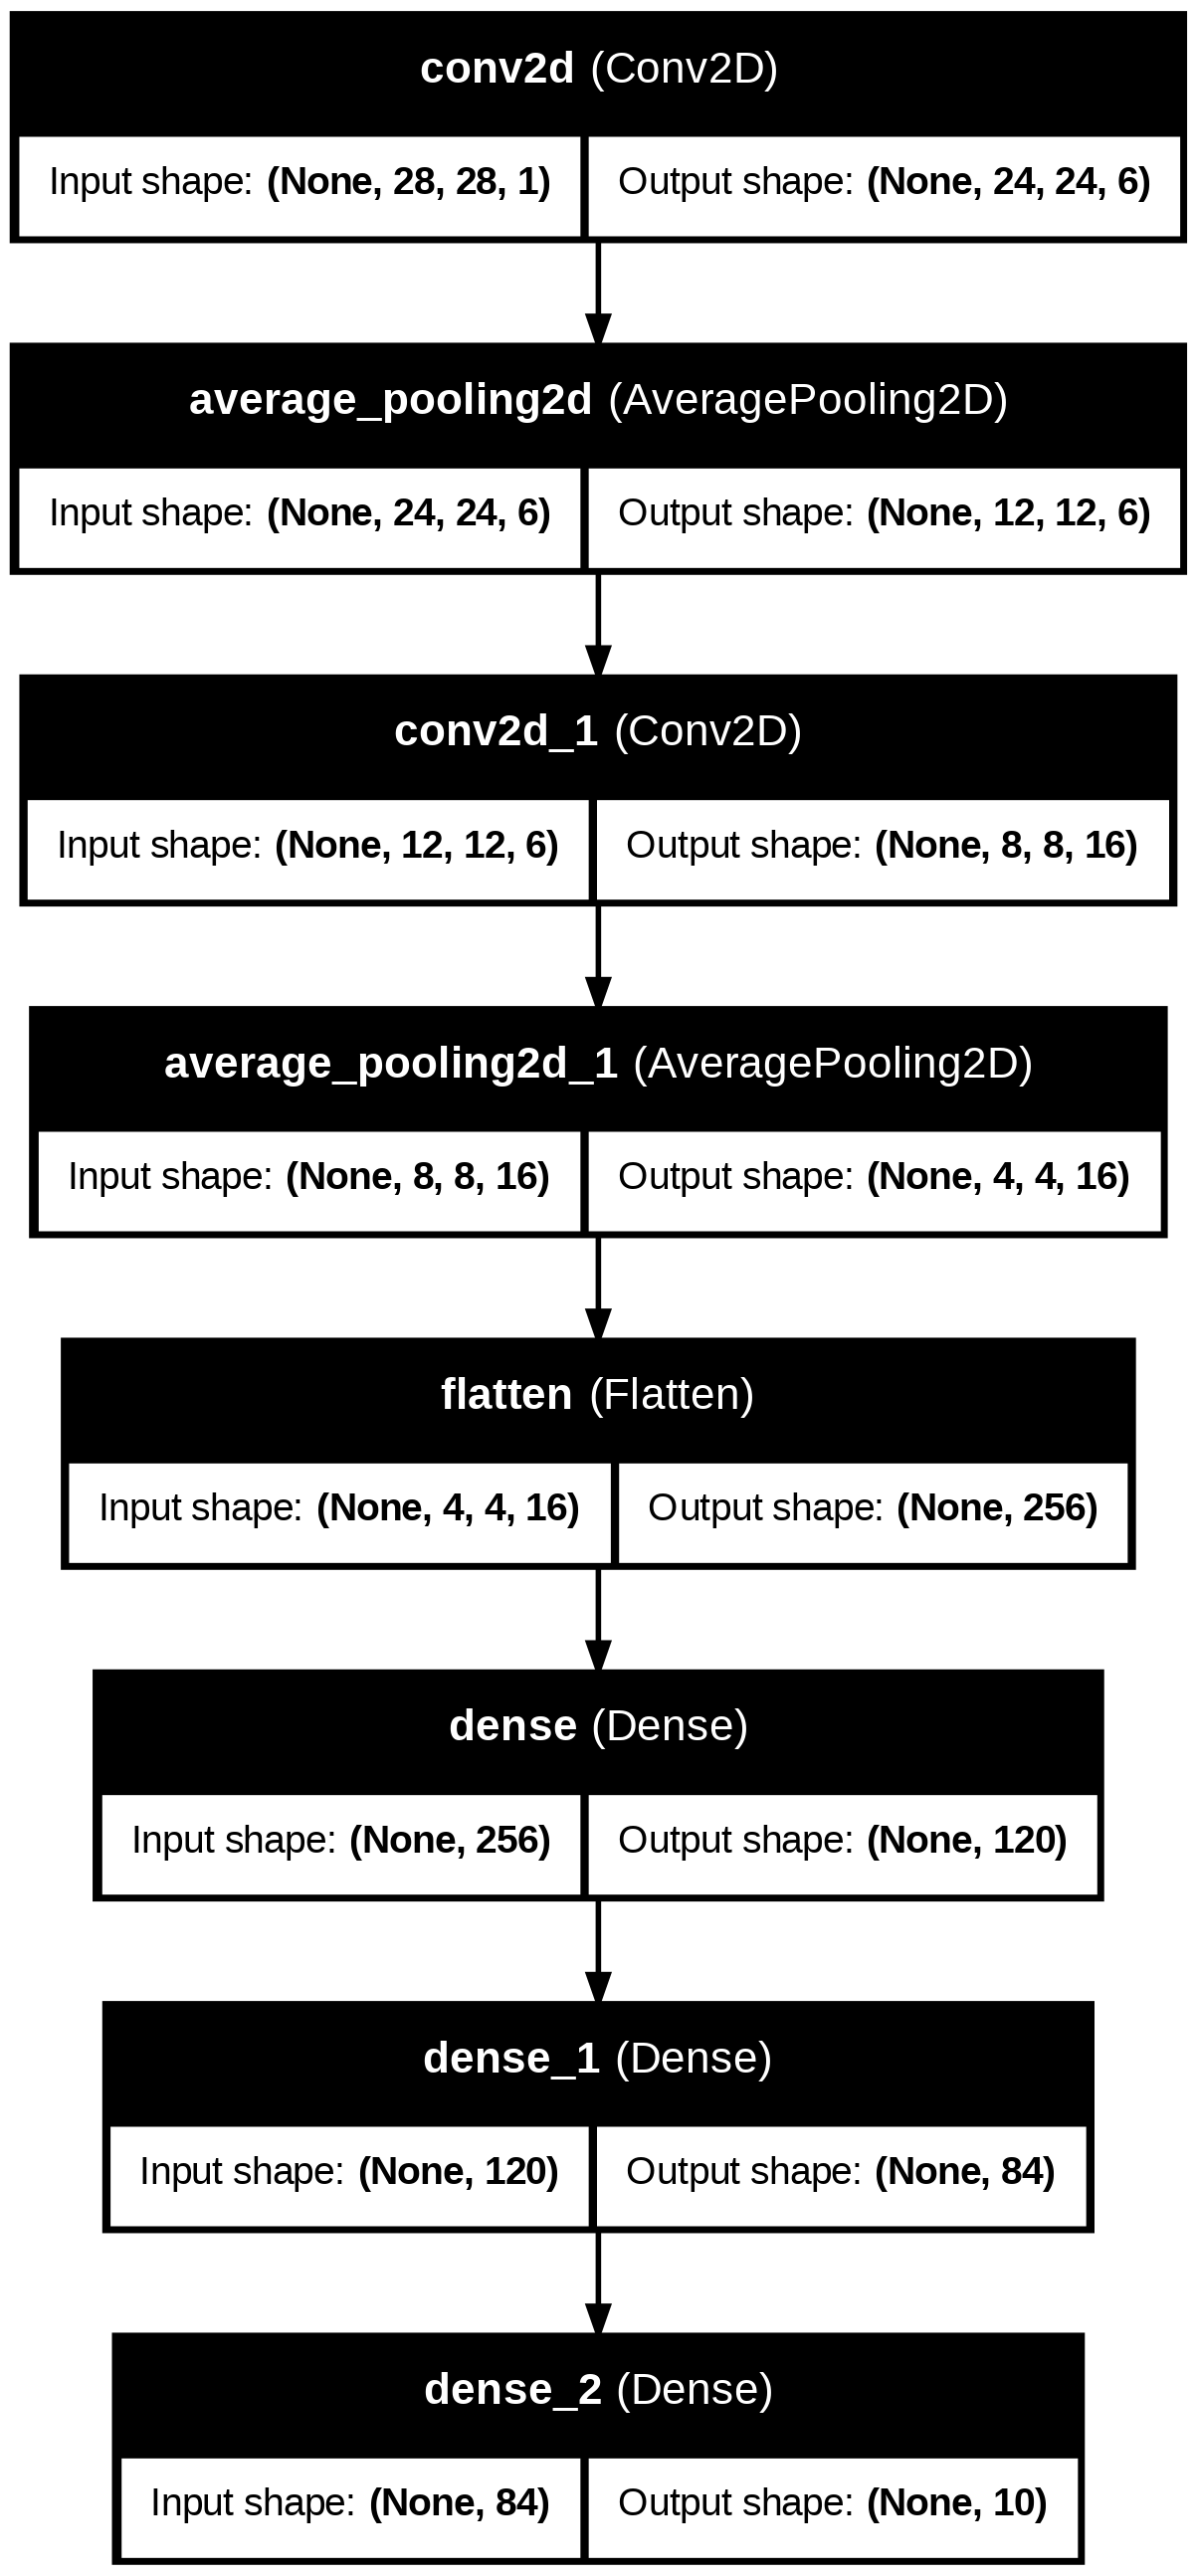

In [9]:
# plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
# compilamos la arquitectura
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [11]:
# training with history
history = model.fit(train_x, train_y, batch_size=128, epochs=20, verbose=1, validation_data=(test_x, test_y))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7794 - loss: 0.7459 - val_accuracy: 0.9599 - val_loss: 0.1261
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9616 - loss: 0.1278 - val_accuracy: 0.9710 - val_loss: 0.0878
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9740 - loss: 0.0854 - val_accuracy: 0.9765 - val_loss: 0.0692
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9803 - loss: 0.0648 - val_accuracy: 0.9847 - val_loss: 0.0457
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9839 - loss: 0.0523 - val_accuracy: 0.9836 - val_loss: 0.0479
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9864 - loss: 0.0444 - val_accuracy: 0.9842 - val_loss: 0.0489
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9881 - loss: 0.0384 - val_accuracy: 0.9880 - val_loss: 0.0368
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9893 - loss: 0.0333 - val_accuracy: 

In [16]:
# algunas herramienas para graficar los resultados.
def plot_exmple(X, y, y_pred=None):

    """
        Plot 8 examples and their associated labels

        Parameters:
        -X: Training examples
        -y : true labels
        -y_pred: predicted labels
    """

    # create figure with 3x3 sub-plots
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    X, y = X[:9], y[:9]

    for i, ax in enumerate(axes.flat):
        # Plot image
        ax.imshow(X[i].reshape(28, 28), cmap='binary')

        # show true an predicted classes.
        xlabel = "{0}, pred: {1}".format(y[i], y_pred[i])

        # show the classes as the label in the x axis
        ax.set_xlabel(xlabel)

        # remove ticks from the plot
        ax.set_xticks([])
        ax.set_yticks([])

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [17]:
# evaluación final
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9854 - loss: 0.0538
Test loss: 0.03835293650627136
Test accuracy: 0.9891999959945679


In [18]:
# veamos como se guarda el modelo
model.save("lenet_model.h5")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


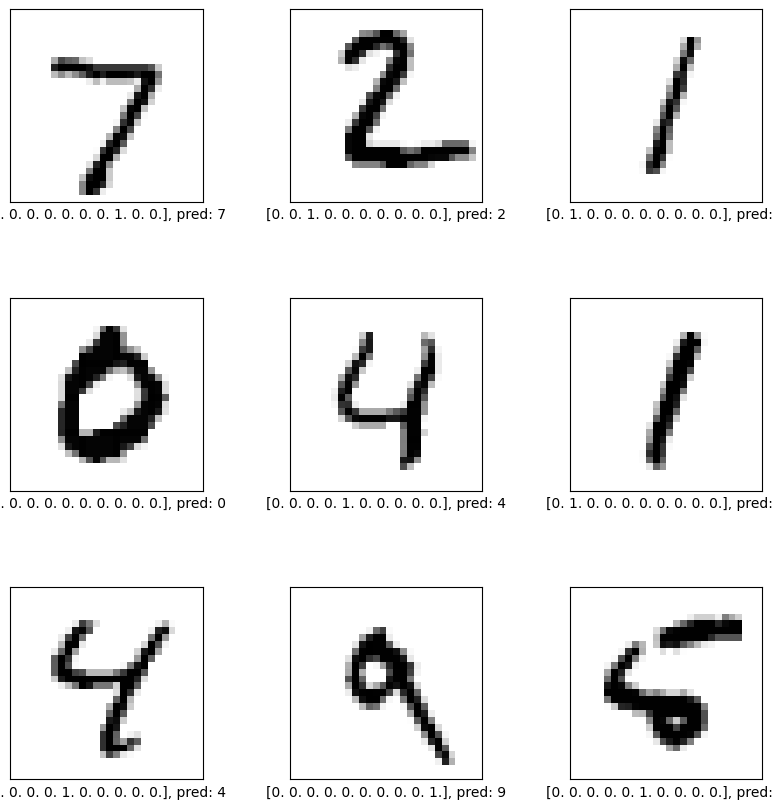

In [19]:
# mas chequeos
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model= tf.keras.models.load_model("lenet_model.h5")

# make predictions
y_pred = model.predict(test_x)
y_pred = np.argmax(y_pred, axis=1)

# plot some samples with model predictions
plot_exmple(test_x, test_y, y_pred)


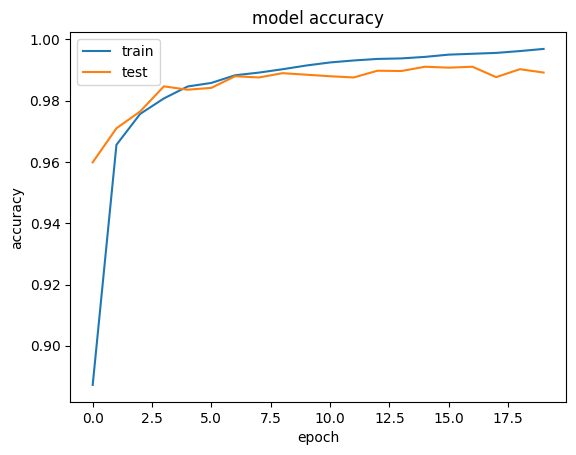

In [20]:
# accuracy plots
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
A las 8:00 pm.

# AlexNet (2012).
A. Krizhevsky, Ilya Sutskever, and Geoffrey E. Hinton. Imagenet classification with
deep convolutional neural networks. Communications of the ACM, 60:84 – 90, 2012.

* Ganadora del [ImageNet Large Scale Visual Recognition Challenge ILSVR](https://www.image-net.org/challenges/LSVRC/).

* Algunos números imporantes:
    * 1.2 millones de Imágenes de resolucin  $224 \times 224$ pixeles.
    * 50mil de validación
    * 150 mil de prueba.
    * 1000 clases.
    * Sobre el 90 por ciento en precisión
    * Se usaron los GPU por primera vez en esta tecnologia (computer vision).
    Para eso diseñaron dos redes para cada GPU. Hoy eso ya no es necesario.


La siguiente figura ilustra la arquitectura de la red.









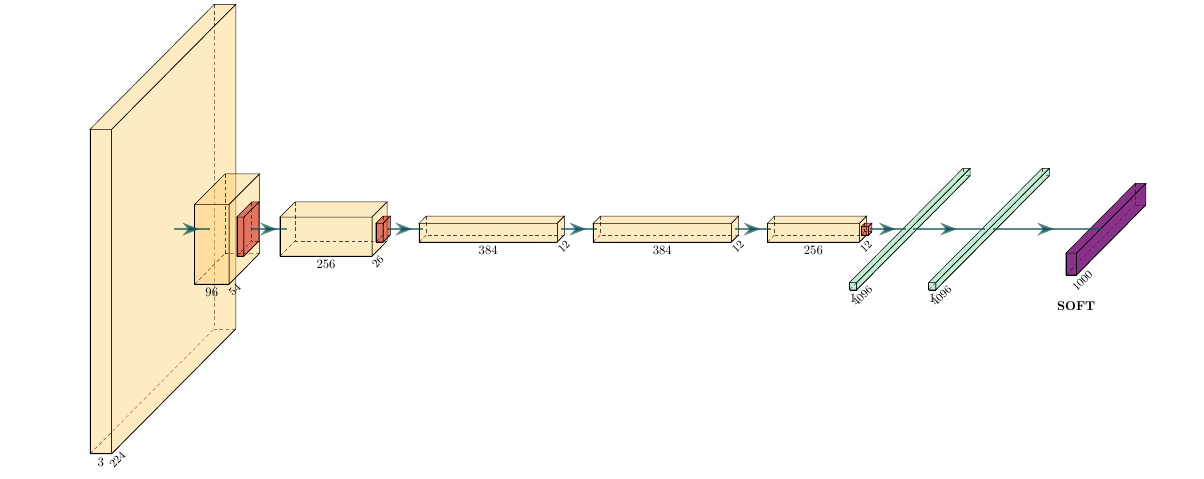

### Comparación entre el AlexNet y el LeNet-5
* **Capas convolucionales**: LetNet5 con 3 y AlexNet con 5.
* **Funciones de Activación**: LeNet5 (tanh, pero nosotros programaos el ReLU). AlexNet usa ReLU.
* **Pooling**: El LeNet-5 usa average pooling, el AlexNet usa MaxPooling.
* El AlexNet usa normalización y dropout como herramientas de regularización. El dropout fue inventado por el grupo de Hinton como parte del desarrollo del AlexNet.

### Descripción detallada de la arquitectura.

* **Capa de entrada y primera convolución**: La capa de entrada tiene imágnes de $224 \times 224 \times 3$ pixeles (en colores RGB). Se convoluciona con un kernel de $11 \times 11$, stride $s=4$, no padding. Recuerde $(224-11)/4+1=54.25 \approx 24 $. La salida es $$ \text{salida} = 54 \times 54 \times 96 $$

$$\text{learning parameters} = (11 \times 11 \times 3) \times 96 = 34944  $$

Agragamos una capa de normalización (Batch Normalization).

Los 96 filtros se muestran en la siguiente figura (tomados del artículo original).



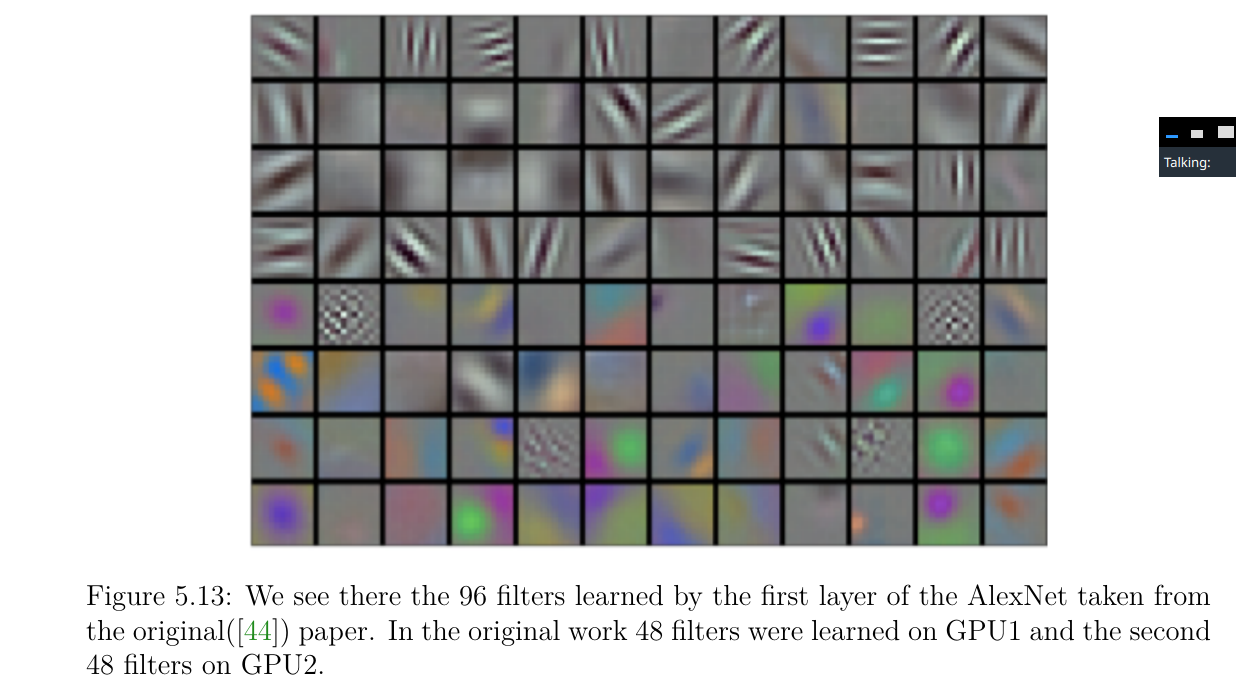

* **MaxPooling**: Kernel $(3 \times 3)$, stride $s=2$.
Salida $(54-3)/2+1= 26.5 \approx 26 $. Se usan 96 filros.

$$\text{salida} = 26 \times 26 \times 96 $$

* **convolución 2**: Se usa un kernel de $(5 \times 5)$, stride $s=1$, $pad=2$. 256 filtros. Salida $(26 - 5 + 2(2)/1 + 1= 26. $

$$\text{salida} = (26 \times 26 \times 256) $$

$$\text{learning parameters} = (5 \times 5 \times 96 +1) \times 256= 614656 $$

* **MaxPooling**: Kernel $(3 \times 3)$, stride $s=2$, no padding, 256 filtros. $(26-3)/2 + 1 = 12.5 \approx 12.$

$$\text{salida} = (12 \times 12 \times 256) $$

* **Convolución 3**: Kernel $3 \times 3$, stride $s=1$, pad $p=1$, 384 filtros. Salida $(12 -3 + 2)/1 + 1 = 12 $

$$\text{salida} = (12 \times 12 \times 384) $$

$$\text{learning parameters} = (3 \times 3 \times 256 + 1) \times 384= 885120 $$

* **convolución 4**: Kerel $3 \times 3$, $s=1$, padding $p=1$, también 384 filtros. $$(12 -3 + 2)/1 +1 = 12 $$
La salida es

$$\text{salida} = 12 \times 12 \times 384 $$

$$\text{learning parameters}=(3 \times 3 \times 384+1) \times 384 = 1327488 $$


* **convolución 5**: Kernel $3 \times 3$ , stride $s=1$, padding $p=1$ (same).
$$(12 - 3 + 2(1))/1 + 1=12 $$, el numero de filtros 256
$$\text{salida} = 12 \times 12 \times 256  $$

$$ \text{learning parameters} = (3 \times 3 \times 384 +1) \times 256=884992$$

* **MaxPooling**: kernel $3 \times 3$, stride $s=2$, no padding. $(12-3)/2+1 = 5.5 \approx 5 $. El numero de filtros de salida 256.


$$\text{salida} = 5 \times 5 \times 256 $$

* **Dropout regularization**: Rate 0.5. ReLU activation.

* **Flatten** (volver el tensor, un "chorizo".
La salida es

$$\text{salida} = 5 \times 5 \times 256 = 6400 $$
No está en el dibujo de la arquitectura.

* **Fully connected** (todos-con-todos). Con 4096 nodos de salida. Dropout de 0.5

$$\text{learing parameters} = (6400 + 1) \times 4096 = 26218496
 $$

* **Fully connected**: Entrada es 4096 salida 4096, dropout=0.5

$$\text{learning parameters} = (4096 + 1) \times 4096 = 16781312 $$

* **Fully connected (softmax)**: Entrada son $4096$ y salida $1000$. Dropout rate 0.5

Implementación en `Python`.

In [37]:
import tensorflow_datasets as tfds
import logging

# Suppress potential future warnings from tensorflow_datasets
logging.getLogger('tensorflow_datasets').setLevel(logging.ERROR)

try:
    # descargar el conjunto OxFlower102
    dataset, info = tfds.load('oxford_flowers102', split='train', with_info=True, as_supervised=True)

    #into
    print(info)

except Exception as e:
    print(f"An error occurred: {e}")
    print("Could not download the dataset. This might be a temporary network issue or the dataset source might be unavailable.")
    print("Please try running the cell again. If the problem persists, you might need to check your network connection or try again later.")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

An error occurred: HTTPSConnectionPool(host='www.robots.ox.ac.uk', port=443): Max retries exceeded with url: /~vgg/data/flowers/102/102flowers.tgz (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7e426340dee0>: Failed to establish a new connection: [Errno 111] Connection refused'))
Could not download the dataset. This might be a temporary network issue or the dataset source might be unavailable.
Please try running the cell again. If the problem persists, you might need to check your network connection or try again later.
